# Based on 'Figures for paper' notebook format

This notebook holds the results of the short sims (3 hours) using the cv bound 4000-7000 mm/s:

low (corr, pli+corr)
- 1371421
- 1371415 -FAILED

high

- 1371432 - FAILED
- 1371418

variable
- 1371434
- 1371431


And the results for short sims using the cv bound 5 - 200 mm/s:

low

- 1385054

In [1]:
import sys
import glob
import numpy as np
import seaborn as sns

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0, "/scratch/l/lfefebvr/noorir/model/")

OUTPUT_PATH = '/scratch/l/lfefebvr/noorir/model/Output/'

# Helper Functions

In [2]:
def plot_ts(nodes, all_ts):
    plt.figure(2, figsize=(40, 6))
    for sing_node in range(nodes):
        plt.plot(np.array(all_ts)[sing_node])
    plt.show()
    

# Choosing which jobs to analyze

In [17]:
JOB = ['1371421','1371434','1385054',
       '1371418',
        '1371431']
NTASKS =[120]
NUM_JOBS = len(JOB)

# jobs for 3 diff cases runs
# correlation, ploi+corr

# Saving the names of the variable load files for each run

In [18]:
# Loading variable file names we will use for analysis into a dictionary

load_files = {} #names of all the load_vars_ts_delays files

for job in JOB:
    var = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load_genvars_delay*")
    var_alt = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"load*")
    if len(var) ==1:
        load_files[job] = var[0]
    elif len(var_alt) ==1:
        load_files[job] = var_alt[0]
        
        
if len(load_files.keys()) == len(JOB):
    print("Loaded vars files successfully", len(JOB))
load_files

Loaded vars files successfully 5


{'1371418': '/scratch/l/lfefebvr/noorir/model/Output/2019-06-11/1371418/load_genvars_delays_pli_corr_short_3.py',
 '1371421': '/scratch/l/lfefebvr/noorir/model/Output/2019-06-11/1371421/load_genvars_delays_short_0.py',
 '1371431': '/scratch/l/lfefebvr/noorir/model/Output/2019-06-11/1371431/load_genvars_delays_pli_corr_short_5.py',
 '1371434': '/scratch/l/lfefebvr/noorir/model/Output/2019-06-11/1371434/load_genvars_delays_short_4.py',
 '1385054': '/scratch/l/lfefebvr/noorir/model/Output/2019-06-16/1385054/load_0.py'}

# Creating a dictionary to hold all the best solution vectors (all_res)

In [19]:
# Retreive the best solution - all_res is dict with arrays with the conduction 
# velocities vector that had the lowest MSE at the end of the diff evol algorithm

all_res = {} #dictionary of all the solution arrays
i=0
for job in JOB:
    full_list = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*") #list of all results for a single job
    if len(full_list) in NTASKS:
        low = 1
        for res in full_list:
            start = res.index("_")+1
            end = res.index(".npy")
            if float(res[start:end])< low:
                low = float(res[start:end])
        print(i," Job: "+job+", lowest MSE: ", low)
        i = i+ 1
        final_res_ = glob.glob(OUTPUT_PATH+"*/"+job+"/"+"rank*"+str(low)+"*")[0]
        all_res[job]= np.load(final_res_)
    else:
        print("Error", job)
        break

0  Job: 1371421, lowest MSE:  0.015769005724644305
1  Job: 1371434, lowest MSE:  0.0034965025000091832
2  Job: 1385054, lowest MSE:  0.00041795554475300244
3  Job: 1371418, lowest MSE:  0.0
4  Job: 1371431, lowest MSE:  0.0


# Heatmaps - target CV vs estimated CV

- list of all mse CV values (all_mse)
- dictionary of all target CV matrices (all_res_true)

--------------------------CORR------------------------------------
1371421  true vs est: mse =  2.70835012583


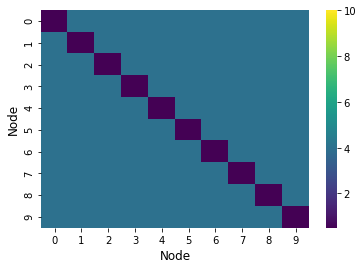

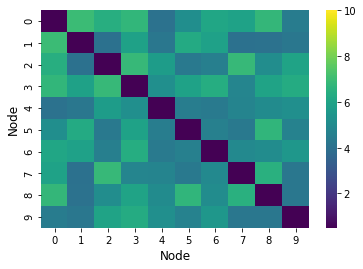

--------------------------CORR------------------------------------


/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in reciprocal


1371434  true vs est: mse =  1.37247940776


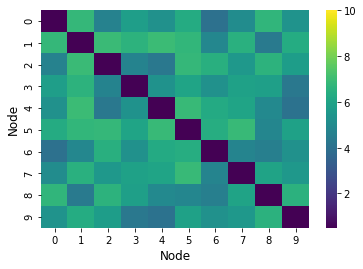

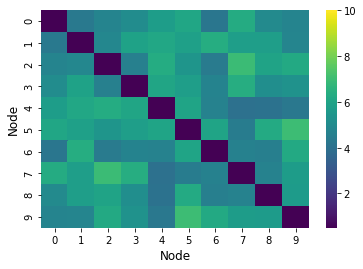

--------------------------CORR------------------------------------
--------------------------PLI+CORR------------------------------------
1385054  true vs est: mse =  0.00766601411422


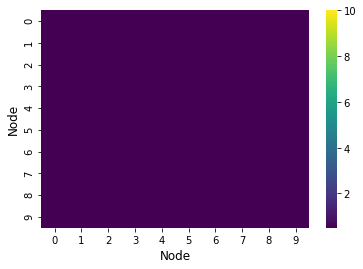

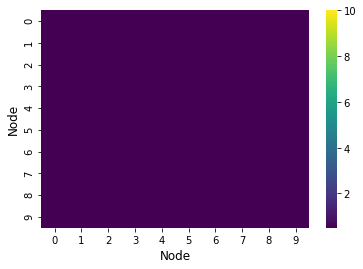

--------------------------PLI+CORR------------------------------------
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1371418  true vs est: mse =  1.27545541012


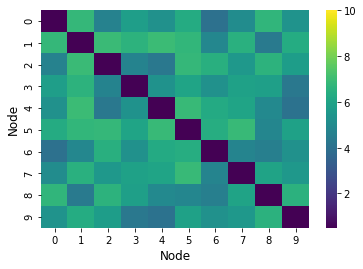

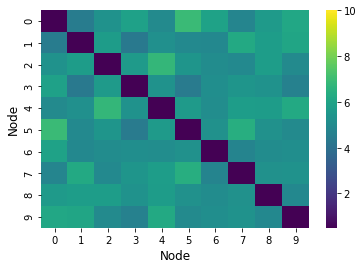

--------------------------PLI+CORR------------------------------------
Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1371431  true vs est: mse =  2.86213691506


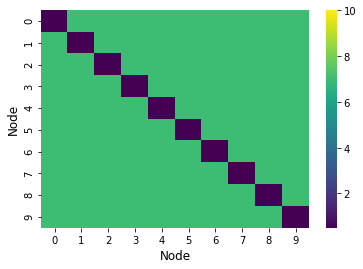

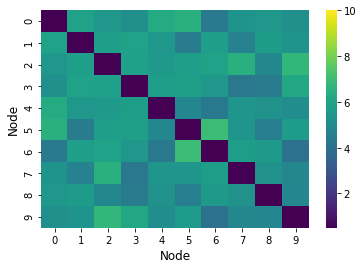

In [20]:
all_mse = []
all_res_true = {} #dictionary of all the target arrays

##########################################################################
def plot_heat_cv(data, num_i = 0):
    """
    data is on the order of mm/s
    """
    %matplotlib inline
    sns.heatmap(hf.p2matrix(data,10)/1000, vmax = 10, vmin = 0.5, cmap = "viridis")
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
    #plt.savefig(JOB[num_i]+"est_cv.png", facecolor = "None")
    plt.show()
##########################################################################

for i in range(NUM_JOBS):
    
    # visual dividers
    if i in range(0,3):
        print("--------------------------CORR------------------------------------")
    if i in range(2,NUM_JOBS):
        print("--------------------------PLI+CORR------------------------------------")
        
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    all_res_true[JOB[i]] = c_mat
    if i == 1:
        master_tract = tract_mat
    
    # Calculate MSE between true and target for each
    thing = np.triu(np.reciprocal(all_res_true[JOB[i]], where = all_res_true[JOB[i]] >0),1).ravel()
    true_cv_vec = thing[thing != 0]
    err = hf.mse(true_cv_vec/1000,all_res[JOB[i]]/1000)
    all_mse.append(err)
    print(JOB[i], " true vs est: mse = ", err)
    #if you want to white-out the diagonals:
    #sns.heatmap(hf.p2matrix(thing[thing != 0],10)/1000, mask = hf.p2matrix(thing[thing != 0],10)/1000 ==0, 
    #            vmax = 10, vmin = 0.5, cmap = "viridis")
    plot_heat_cv(true_cv_vec,i)
    plot_heat_cv(all_res[JOB[i]],i)

In [ ]:
all_mse

In [ ]:
#save all matrices of all res
# for i in range(len(JOB)):
#     np.save(JOB[i],hf.p2matrix(all_res[JOB[i]],10)/1000)

# Target Data - Plot of MEG time series and Correlation Matrix

1371421


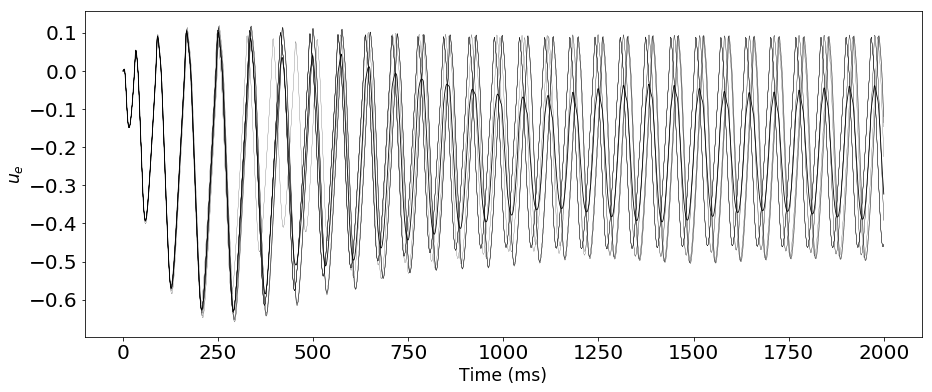

/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in reciprocal


1371434


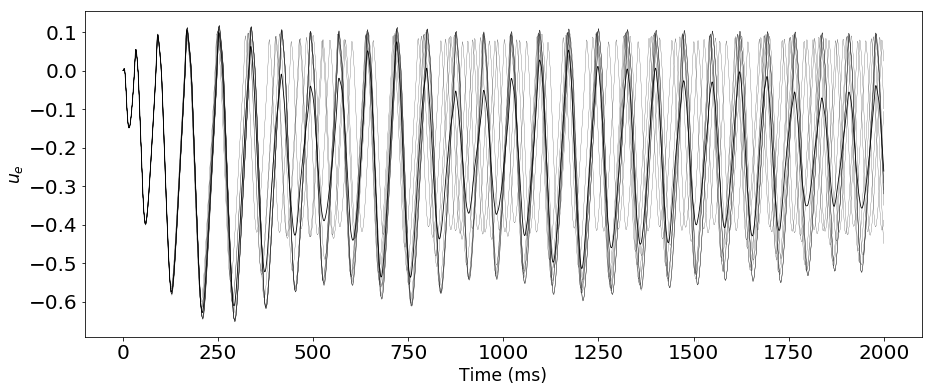

1385054


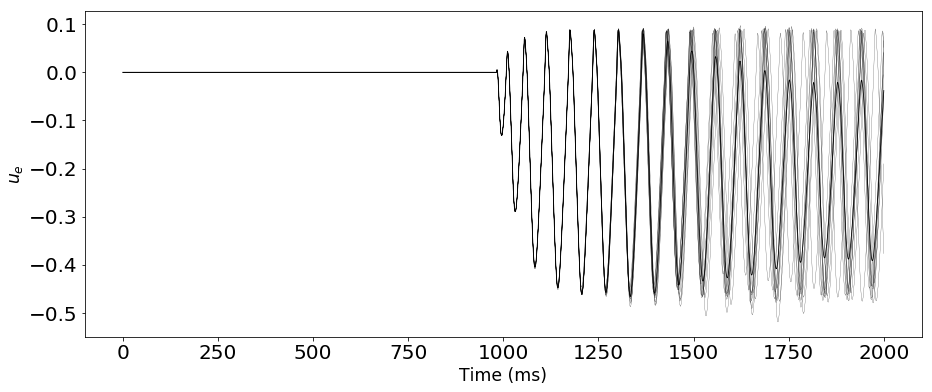

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1371418


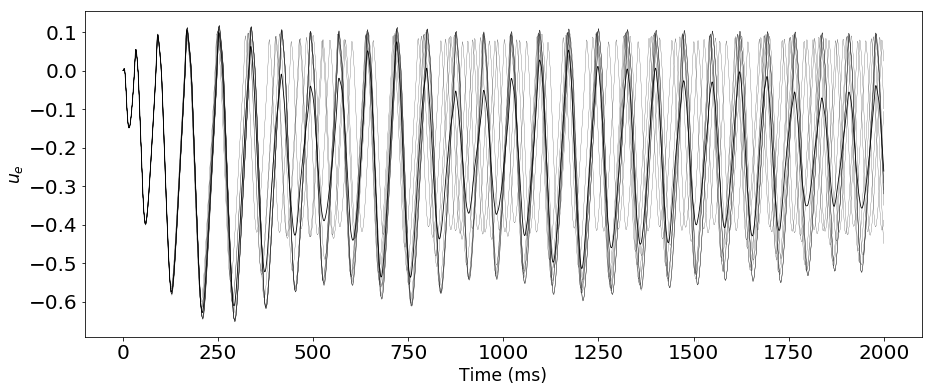

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]
1371431


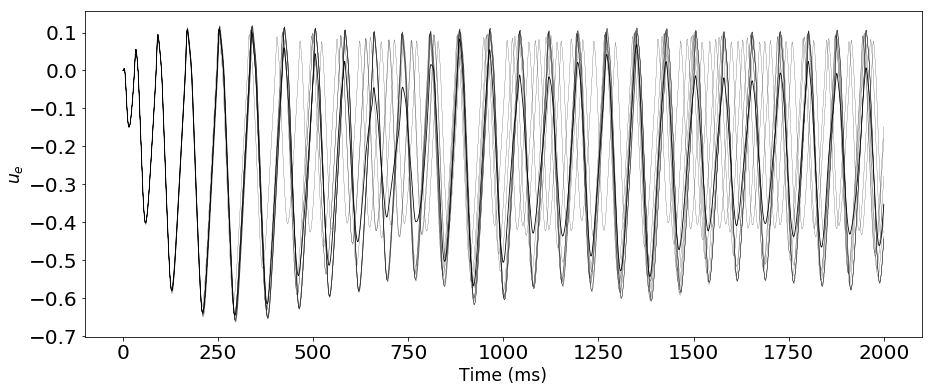

In [22]:
for i in range(NUM_JOBS):
    exec(open(load_files[JOB[i]]).read())
    print(JOB[i])
    
    plt.figure(3, figsize=(15,6))
    for sing_node in range(nodes):
        plt.plot(ue_array[sing_node], '-k', linewidth=0.2)
    avg = np.mean(ue_array, axis= 0 )
    plt.plot(avg, '-k', linewidth = 0.8)
    plt.xlabel("Time (ms)", fontsize = "xx-large")
    plt.ylabel("$u_e$", fontsize = "xx-large")
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()


# Histograms of all the estimated CV estimates

- mean and std of distribution for each network estimation (the #'s that show on top of the plots):
- gr_means = []
- gr_std = []

--------------------------CORR------------------------------------
1371421 cv estimate distribution


/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


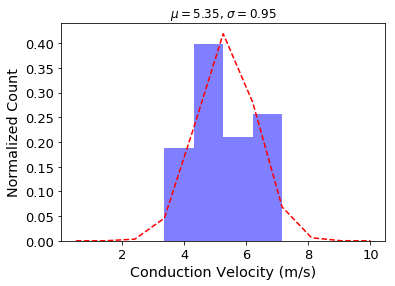

1371421 signal delay estimate distribution


/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:47: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


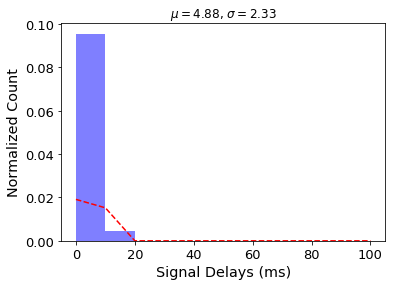

--------------------------CORR------------------------------------
1371434 cv estimate distribution


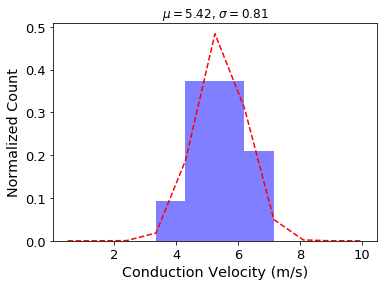

1371434 signal delay estimate distribution


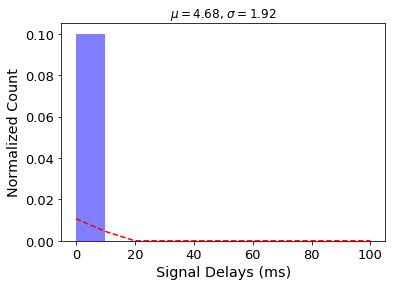

--------------------------CORR------------------------------------
--------------------------PLI+CORR-----------------------------------------
1385054 cv estimate distribution


/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


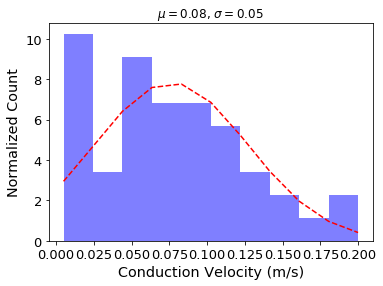

1385054 signal delay estimate distribution


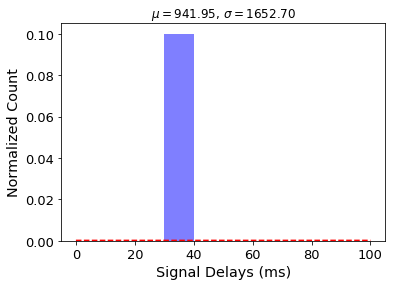

--------------------------PLI+CORR-----------------------------------------
1371418 cv estimate distribution


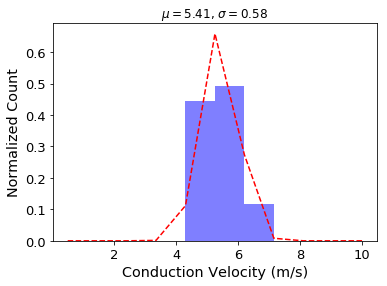

1371418 signal delay estimate distribution


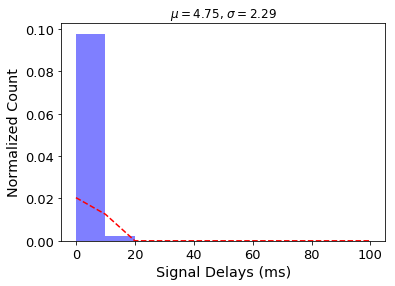

--------------------------PLI+CORR-----------------------------------------
1371431 cv estimate distribution


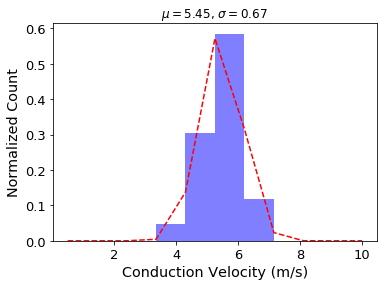

1371431 signal delay estimate distribution


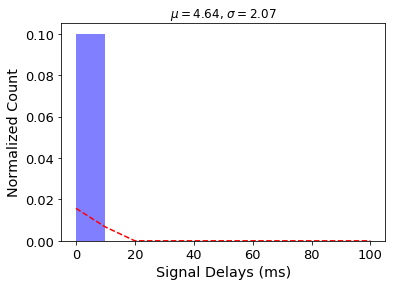

In [24]:
#Estimates

gr_means = []
gr_std = []
for cv in range(NUM_JOBS):
    
    # visual dividers
    if cv in range(0,3):
        print("--------------------------CORR------------------------------------")
    if cv in range(2,NUM_JOBS):
        print("--------------------------PLI+CORR-----------------------------------------")
        
    print(JOB[cv], "cv estimate distribution")
    # the histogram of the data
    n, bins, patches = plt.hist(all_res[JOB[cv]]/1000, density=True, facecolor='blue', alpha=0.5, range = (0.5,10))
    if JOB[cv] == "1385054":
        n, bins, patches = plt.hist(all_res[JOB[cv]]/1000, density=True, facecolor='blue', alpha=0.5, range = (0.005,0.2))


    mu = np.average(all_res[JOB[cv]]/1000)
    sigma = np.std(all_res[JOB[cv]]/1000)
    
    gr_means.append(mu)
    gr_std.append(sigma)
    # add a 'best fit' line
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--')
    plt.xlabel("Conduction Velocity (m/s)", fontsize = 'x-large')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.ylabel('Normalized Count', fontsize = 'x-large')
    plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
    plt.show()
    
    print(JOB[cv], "signal delay estimate distribution")
    trac = np.triu(master_tract,1).ravel()
    trac= trac[trac > 0]
    # the histogram of the data
    n, bins, patches = plt.hist((trac/all_res[JOB[cv]])*1000, density=True, facecolor='blue', alpha=0.5, range = (0,100))
    
    mu = np.average((trac/all_res[JOB[cv]])*1000)
    sigma = np.std((trac/all_res[JOB[cv]])*1000)
    # add a 'best fit' line
    y = mlab.normpdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--')
    plt.xlabel("Signal Delays (ms)", fontsize = 'x-large')
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.ylabel('Normalized Count', fontsize = 'x-large')
    plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

    # Tweak spacing to prevent clipping of ylabel
    plt.subplots_adjust(left=0.15)
    plt.show()


# Target CV and Signal Delays

--------------------------CORR------------------------------------
1371421 cv true distribution


/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
/home/l/lfefebvr/noorir/.local/lib/python3.6/site-packages/matplotlib/mlab.py:1513: RuntimeWarning: divide by zero encountered in double_scalars
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)
/home/l/lfefebvr/noorir/.local/lib/python3.6/site-packages/matplotlib/mlab.py:1513: RuntimeWarning: invalid value encountered in multiply
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)


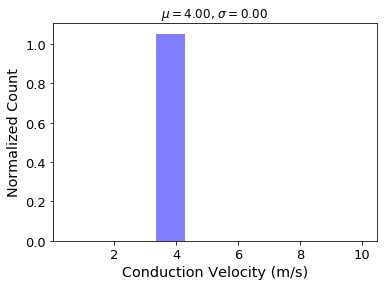

1371421 signal delay true distribution


/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


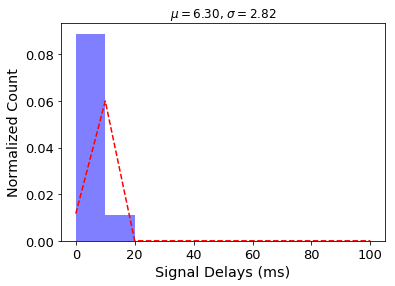

--------------------------CORR------------------------------------
1371434 cv true distribution


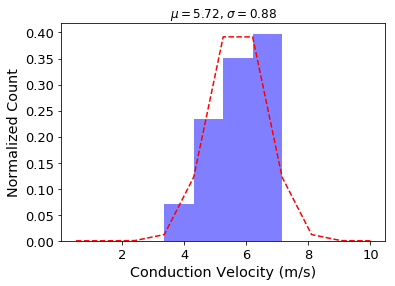

1371434 signal delay true distribution


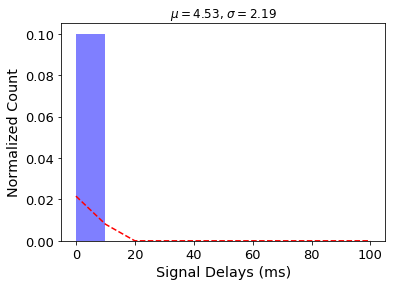

--------------------------CORR------------------------------------
1385054 cv true distribution
[ 0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005
  0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005
  0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005
  0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005  0.005
  0.005  0.005  0.005  0.005  0.005]


/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/numpy/lib/function_base.py:817: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bins


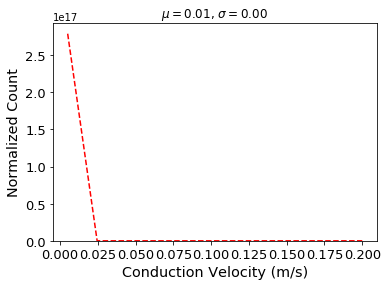

1385054 signal delay true distribution


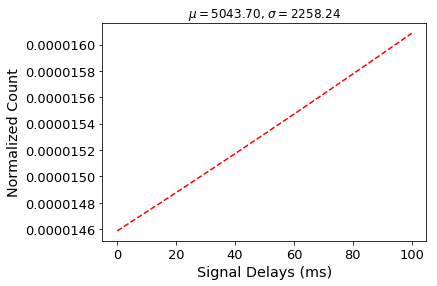

--------------------------PLI+CORR-----------------------------------------
1371418 cv true distribution


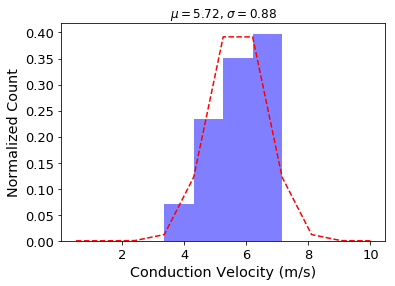

1371418 signal delay true distribution


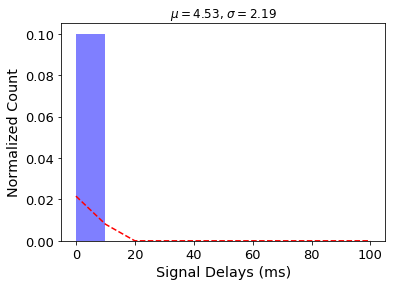

--------------------------PLI+CORR-----------------------------------------
1371431 cv true distribution


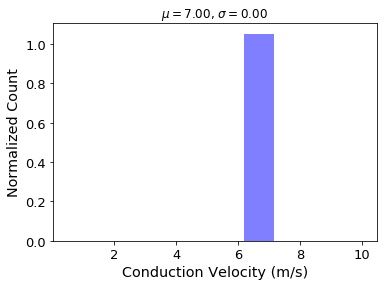

1371431 signal delay true distribution


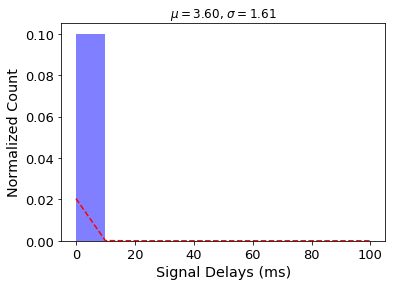

In [28]:
for cv in range(NUM_JOBS):    

    # visual dividers
    if cv in range(0,3):
        print("--------------------------CORR------------------------------------")
    if cv in range(3,NUM_JOBS):
        print("--------------------------PLI+CORR-----------------------------------------")
        
    # the histogram of the data
    print(JOB[cv], "cv true distribution")
    vec= np.reciprocal(all_res_true[JOB[cv]], where = all_res_true[JOB[0]] > 0 )/1000
    vec = np.triu(vec,1).ravel()
    vec = vec[vec != 0]
    if vec.shape[0] ==45:
        n, bins, patches = plt.hist(vec, density=True, facecolor='blue', alpha=0.5, range = (0.5,10))
        if JOB[cv] == "1385054":
            n, bins, patches = plt.hist(vec, density=True, facecolor='blue', alpha=0.5, range = (0.005,0.2))
            print(vec)


        mu = np.average(vec)
        sigma = np.std(vec)
        # add a 'best fit' line
        y = mlab.normpdf(bins, mu, sigma)
        plt.plot(bins, y, 'r--')
        plt.xlabel("Conduction Velocity (m/s)", fontsize = 'x-large')
        plt.xticks(fontsize = 13)
        plt.yticks(fontsize = 13)
        plt.ylabel('Normalized Count', fontsize = 'x-large')
        plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

        # Tweak spacing to prevent clipping of ylabel
        plt.subplots_adjust(left=0.15)
        plt.show()
        

    # the histogram of the data
    print(JOB[cv], "signal delay true distribution")
    vec= np.reciprocal(all_res_true[JOB[cv]], where = all_res_true[JOB[0]] > 0 )/1000
    vec = np.triu(vec,1).ravel()
    vec = vec[vec != 0]
    trac = np.triu(tract_mat,1).ravel()
    trac= trac[trac > 0]
    if vec.shape[0] ==45:
        n, bins, patches = plt.hist(trac/vec, density=True, facecolor='blue', alpha=0.5, range = (0,100))

        mu = np.average(trac/vec)
        sigma = np.std(trac/vec)
        # add a 'best fit' line
        y = mlab.normpdf(bins, mu, sigma)
        plt.plot(bins, y, 'r--')
        plt.xlabel("Signal Delays (ms)", fontsize = 'x-large')
        plt.xticks(fontsize = 13)
        plt.yticks(fontsize = 13)
        plt.ylabel('Normalized Count', fontsize = 'x-large')
        plt.title(r'$\mu={:.2f}$, $\sigma={:.2f}$'.format(mu, sigma))

        # Tweak spacing to prevent clipping of ylabel
        plt.subplots_adjust(left=0.15)
        plt.show()

# Looking at solution matrices + time series

# 1 : CORRELATION


1371421


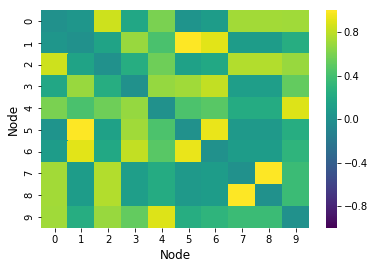

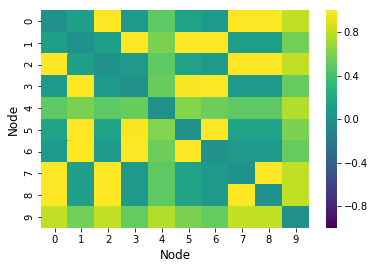

MSE 0.0157690057246


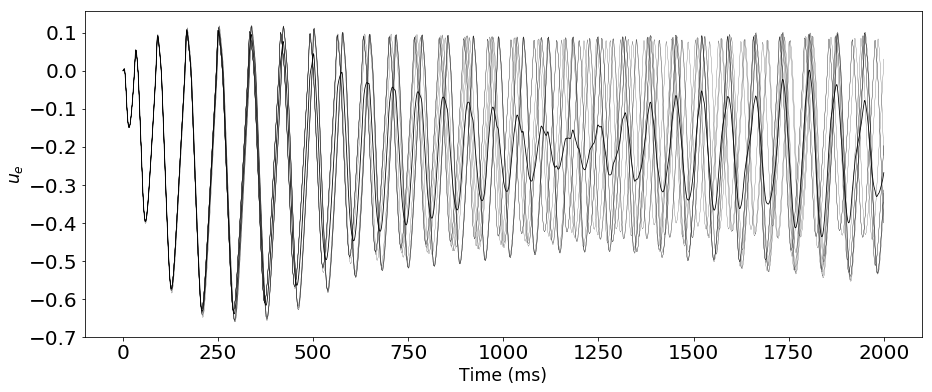

/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in reciprocal


1371434


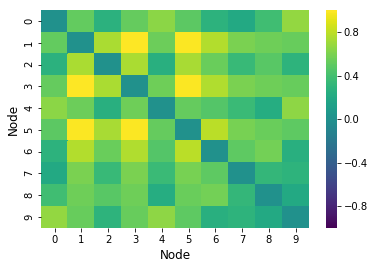

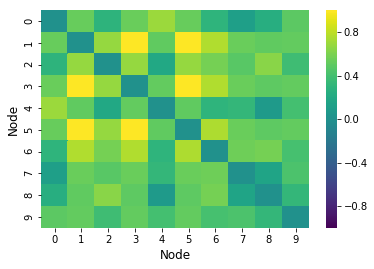

MSE 0.00349650250001


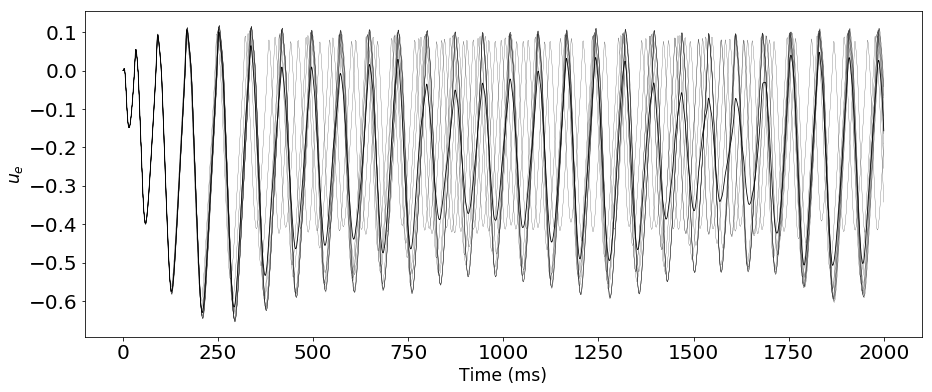

1385054


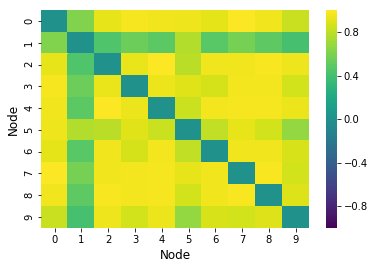

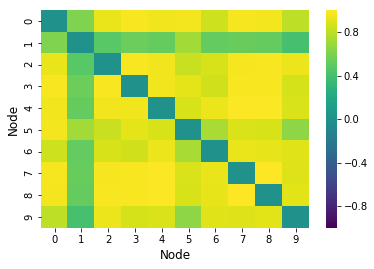

MSE 0.000417955544753


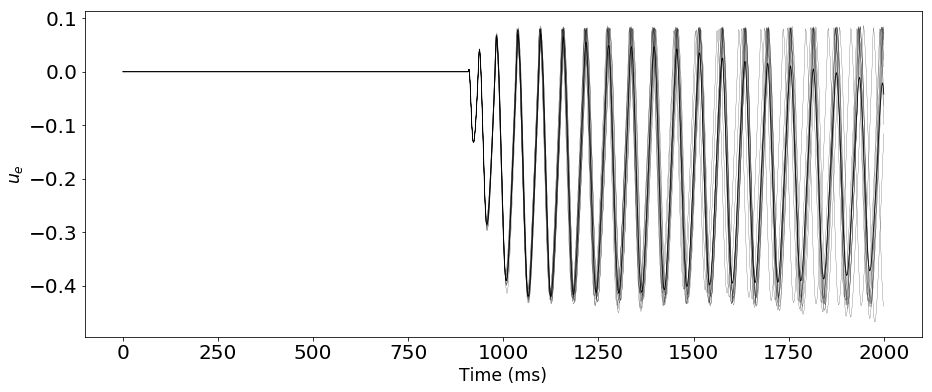

In [29]:
for i in range(0,3):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    print(JOB[i])
    cmat_old_, ue_array_, res_, vmax_ , vmin_ = hf.residuals_cw_corr(all_res[JOB[i]], wc_params, nodes, targ_data, w_mat,
                                            skip, wc_seed, evol_params['optim'], tract_mat, 
                                            heavyside= evol_params['heavi'],plot ="cw")
    
    #plot the correlation matrix
    import seaborn as sns
    skip = 200
    exp_data = hf.plot_cor_mat(ue_array_, nodes, skip)
    np.fill_diagonal(exp_data, 0)
    plt.figure()
    sns.heatmap(exp_data, cmap ="viridis", vmax = 1, vmin =-1)
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
    plt.savefig(JOB[i]+"corr.png", facecolor = "None")
    plt.show()
    
    
    #plot the true correlation matrix
    import seaborn as sns
    skip = 200
    plt.figure()
    sns.heatmap(targ_data, cmap ="viridis", vmax = 1, vmin =-1)
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
    plt.savefig(JOB[i]+"corr_true.png", facecolor = "None")
    plt.show()
    print("MSE", res_)

    #experimental time series
    plt.figure(3, figsize=(15,6))
    for sing_node in range(nodes):
        plt.plot(ue_array_[sing_node], '-k', linewidth=0.2)
    avg = np.mean(ue_array_, axis= 0 )
    plt.plot(avg, '-k', linewidth = 0.8)
    plt.xlabel("Time (ms)", fontsize = "xx-large")
    plt.ylabel("$u_e$", fontsize = "xx-large")
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.savefig(JOB[i]+"ts.png", facecolor = "None")
    plt.show()
    

# 3 : CORRELATION + PLI

In [ ]:
for i in range(3,6):
    exec(open(load_files[JOB[i]]).read()) #loading variables into the environment
    print(JOB[i])
    cmat_old_, ue_array_, res_, exp_data_pli_, exp_data_corr_ = hf.residuals_pli_corr(all_res[JOB[i]], wc_params, fs, nodes,
                                                                    targ_data_corr, targ_data_pli, w_mat, chunk, skip, wc_seed,
                                                                     evol_params['optim'], tract_mat,
                                                                     evol_params['heavi'], 
                                                                     fmin, fmax, plot = True)
    
    #plot the correlation matrix
    import seaborn as sns
    skip = 200
    exp_data = hf.plot_cor_mat(ue_array_, nodes, skip)
    np.fill_diagonal(exp_data_corr_, 0)
    plt.figure()
    sns.heatmap(exp_data_corr_, cmap ="viridis", vmax = 1, vmin =-1)
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
    plt.savefig(JOB[i]+"corr.png", facecolor = "None")

    plt.show()
    
    #plot the pli matrix
    import seaborn as sns
    skip = 200
    
    exp_data = exp_data_pli_
    for row in range(1,nodes):
        for col in range(0, row):
            exp_data[col,row] = exp_data[row,col]
            
    plt.figure()
    sns.heatmap(exp_data, cmap ="viridis", vmax = 1, vmin =0)
    plt.xlabel("Node", fontsize = 'large')
    plt.ylabel("Node", fontsize = 'large')
    plt.savefig(JOB[i]+"pli.png", facecolor = "None")

    plt.show()
    print("MSE", res_)

    #experimental time series
    plt.figure(3, figsize=(15,6))
    for sing_node in range(nodes):
        plt.plot(ue_array_[sing_node], '-k', linewidth=0.2)
    avg = np.mean(ue_array, axis= 0 )
    plt.plot(avg, '-k', linewidth = 0.8)
    plt.xlabel("Time (ms)", fontsize = "xx-large")
    plt.ylabel("$u_e$", fontsize = "xx-large")
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.savefig(JOB[i]+"ts.png", facecolor = "None")

    plt.show()

# EXTRA

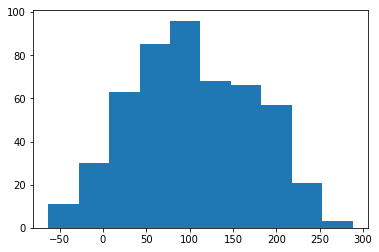

In [36]:
low = 5
high = 200
seed2 = 200
rng = np.random.RandomState(seed2)

vals = []




c_mat_v = rng.uniform(low = 4000,high=7000, size=(num_dim))
c_mat = hf.p2matrix(c_mat_v, nodes)
c_mat = np.reciprocal(c_mat)
np.fill_diagonal(c_mat,0)
plt.hist(np.concatenate((np.random.normal(55,50, 250),np.random.normal(150,50, 250))))
plt.show()

In [29]:
np.concatenate((np.random.normal(2,1, 500),np.random.normal(2,1, 500))).shape

(1000,)